In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os
import warnings; warnings.simplefilter('ignore')


>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [ ]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [ ]:
halo_masses = np.logspace(8, 12, 100) # just for the model

stellar_masses = galhalo.lgMs_D22_det(halo_masses) 

stellar_masses_15 = galhalo.lgMs_D22_dex(halo_masses, 0.15) 

stellar_masses_5 = galhalo.lgMs_D22_dex(halo_masses, 0.5) 

stellar_masses_2 = galhalo.lgMs_D22_dex(halo_masses, 2) 

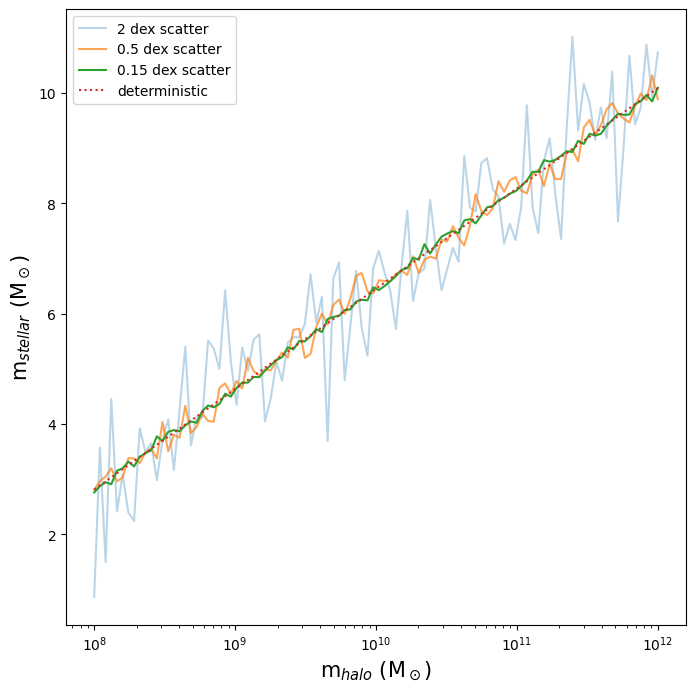

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_2, label="2 dex scatter", alpha=0.3)
plt.plot(halo_masses, stellar_masses_5, label="0.5 dex scatter", alpha=0.7)
plt.plot(halo_masses, stellar_masses_15, label="0.15 dex scatter")

plt.plot(halo_masses, stellar_masses, ls=":", label="deterministic")

plt.xscale("log")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [ ]:
sci_stellar = 10**stellar_masses

def a(z):
    return 1./(1.+z)

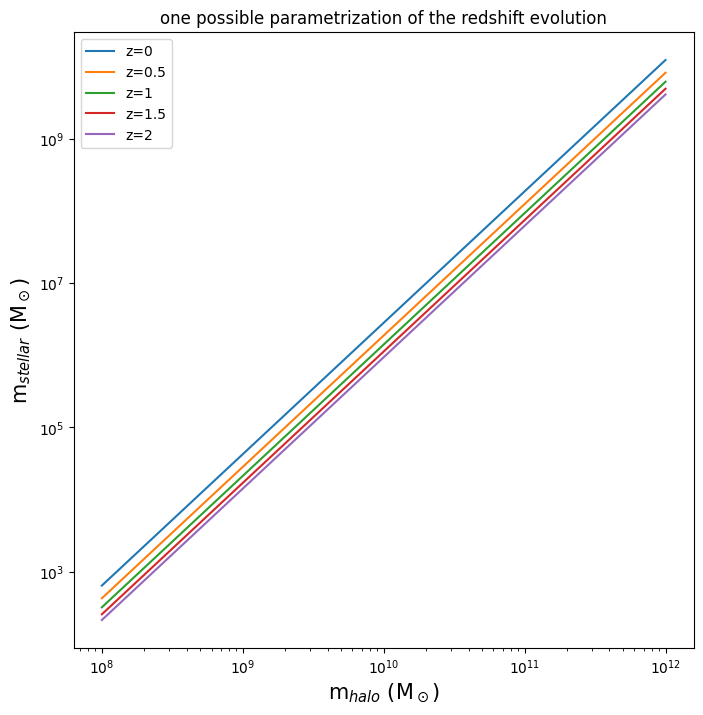

In [ ]:
plt.figure(figsize=(8, 8))

plt.title("one possible parametrization of the redshift evolution")
plt.plot(halo_masses, sci_stellar*a(0), label="z=0")
plt.plot(halo_masses, sci_stellar*a(0.5), label="z=0.5")
plt.plot(halo_masses, sci_stellar*a(1), label="z=1")
plt.plot(halo_masses, sci_stellar*a(1.5), label="z=1.5")
plt.plot(halo_masses, sci_stellar*a(2),  label="z=2")


plt.xscale("log")
plt.yscale("log")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [ ]:
def SHMR_zevo(Mv, z):

    log_e = -1.5
    a = 1.82
    lgMs = log_e + np.log10(10**(12.5)) + a*np.log10(Mv) - a*np.log10(10**(12.5))

    az = 1./(1.+z)
    x = np.exp(-4.*az**2)

    return lgMs - x


SHMR_test_0 = 10**(SHMR_zevo(halo_masses, 0))

SHMR_test_1 = 10**(SHMR_zevo(halo_masses, 0.5))

SHMR_test_2 = 10**(SHMR_zevo(halo_masses, 1))

SHMR_test_3 = 10**(SHMR_zevo(halo_masses, 1.5))

SHMR_test_4 = 10**(SHMR_zevo(halo_masses, 2))

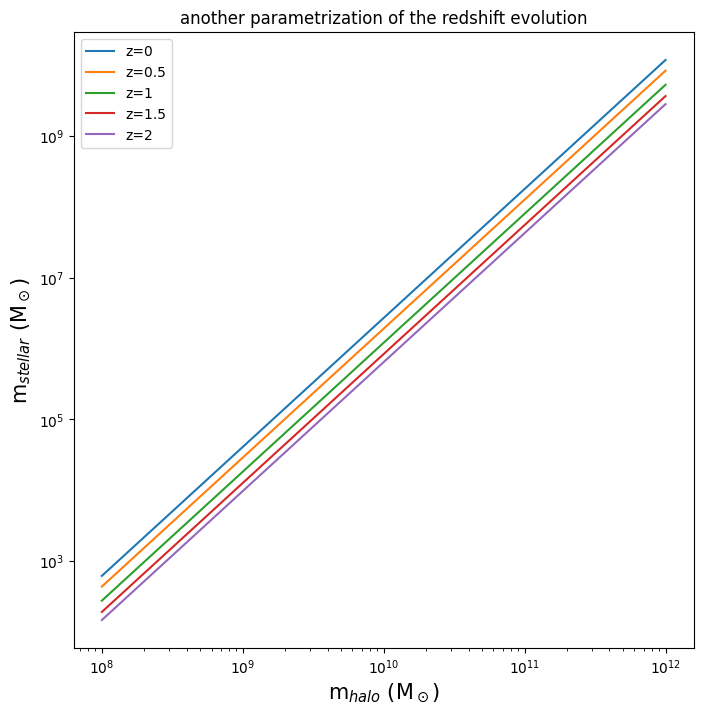

In [ ]:
plt.figure(figsize=(8, 8))

plt.title("another parametrization of the redshift evolution")
#plt.plot(halo_masses, SHMR_test, ls=":", label="deterministic")
plt.plot(halo_masses, SHMR_test_0, label="z=0")
plt.plot(halo_masses, SHMR_test_1, label="z=0.5")
plt.plot(halo_masses, SHMR_test_2, label="z=1")
plt.plot(halo_masses, SHMR_test_3, label="z=1.5")
plt.plot(halo_masses, SHMR_test_4,  label="z=2")

plt.xscale("log")
plt.yscale("log")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.show()

In [ ]:
stellar_masses_RP = galhalo.lgMs_RP17(np.log10(halo_masses), 0)
stellar_masses_B = galhalo.lgMs_B13(np.log10(halo_masses),0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(np.log10(halo_masses), 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(np.log10(halo_masses),0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(np.log10(halo_masses), 1)
stellar_masses_B_2 = galhalo.lgMs_B13(np.log10(halo_masses),1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(np.log10(halo_masses), 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(np.log10(halo_masses),1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(np.log10(halo_masses), 2)
stellar_masses_B_4 = galhalo.lgMs_B13(np.log10(halo_masses),2)



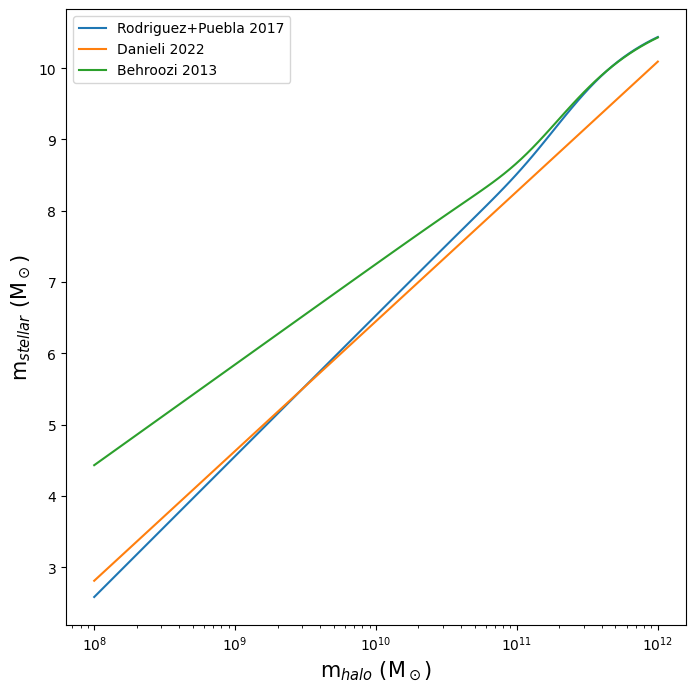

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017")
plt.plot(halo_masses, stellar_masses, label="Danieli 2022")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013")

plt.xscale("log")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

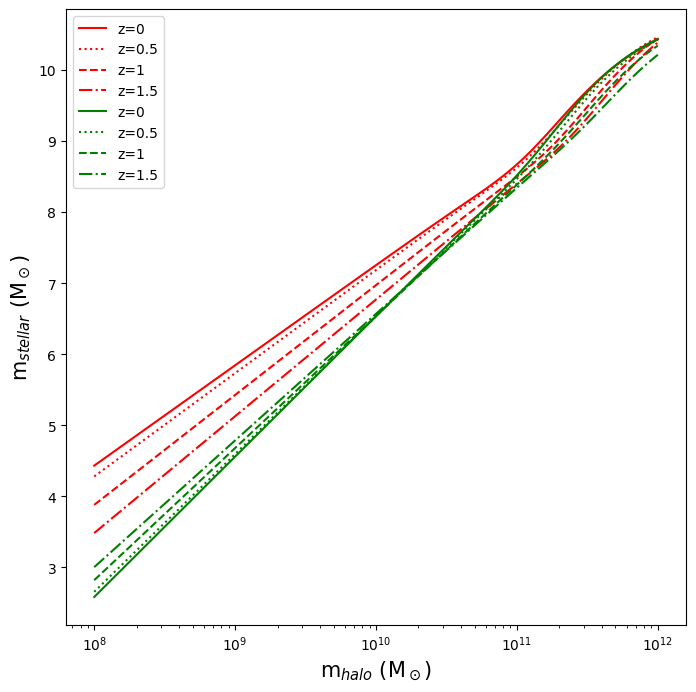

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.xscale("log")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()